# <font color='blue'>Métodos Numéricos</font>
### <font color='red'>13 de octubre de 2025</font>
### Andrés Padrón Quintana 
### <font color='green'>Curso : DATA SCIENCE AND MACHINE LEARNING APPLIED TO FINANCIAL MARKETS </font>

In [2]:
# Cargar librerías
import numpy as np
import math
from scipy import integrate, interpolate, optimize
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, suppress=True)
rng = np.random.default_rng(197485)  # para obtener reproducibilidad

## Bloque 1 — Básico

1. Integración numérica de $e^{-x^{2}}$ en $[0,1]$

In [4]:
# Función a integrar
f = lambda x: np.exp(-x**2)

# Integración con quad
I_quad, err_quad = integrate.quad(lambda x: math.exp(-x**2), 0, 1)

# Regla del trapecio con m mallas
m = 1_000
xs = np.linspace(0, 1, m+1)
ys = f(xs)
I_trapz = np.trapz(ys, xs)

print(f"Integral (quad)  = {I_quad:.8f}   (error est. quad ≈ {err_quad:.2e})")
print(f"Integral (trapz) = {I_trapz:.8f}   (m={m})")
print(f"Diferencia |quad - trapz| = {abs(I_quad - I_trapz):.2e}")


Integral (quad)  = 0.74682413   (error est. quad ≈ 8.29e-15)
Integral (trapz) = 0.74682407   (m=1000)
Diferencia |quad - trapz| = 6.13e-08


**Resultados obtenidos:**
$$
I_{\text{quad}}\approx 0.74682413,\quad
I_{\text{trapz}}\approx 0.74682407\ (m=1000),\quad
\lvert I_{\text{quad}}-I_{\text{trapz}}\rvert \approx 6.13\times10^{-8}.
$$

**Referencia:**
$$
I=\int_{0}^{1} e^{-x^{2}}\,dx \;=\; \frac{\sqrt{\pi}}{2}\,\mathrm{erf}(1).
$$

**Comentario.** Al aumentar $m$, $I_{\text{trapz}} \to I_{\text{quad}}$.

2. Interpolación 1D: Dada la tabla de puntos:

x=[0,1,2,3,4]

y=[1,2.7,5.8,6.6,7.5]

Construye una interpolación cúbica con interp1d y evalúa el valor aproximado de f(2.5).
Grafica los puntos originales y la curva interpolada.

s(2.5) ≈ 6.4328125


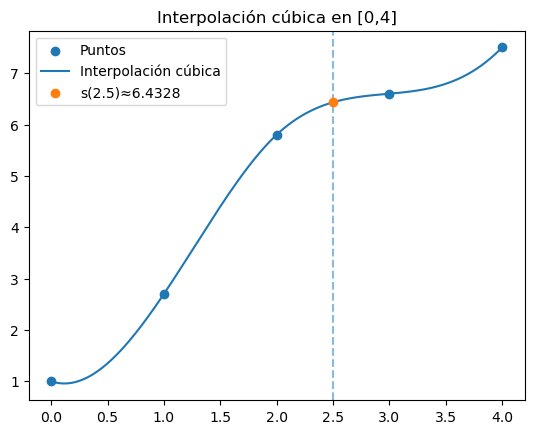

In [5]:
# Construimos la tabla de puntos (los ponemos como float)
x = np.array([0,1,2,3,4], dtype=float)
y = np.array([1,2.7,5.8,6.6,7.5], dtype=float)

# Interpolación Cúbica
interp_cubic = interpolate.interp1d(x, y, kind='cubic')
x_eval = 2.5
y_eval = float(interp_cubic(x_eval))
print(f"s(2.5) ≈ {y_eval:.7f}")

xx = np.linspace(x.min(), x.max(), 300)
yy = interp_cubic(xx)

# Graficamos
plt.figure()
plt.scatter(x, y, label="Puntos")
plt.plot(xx, yy, label="Interpolación cúbica")
plt.axvline(x_eval, ls="--", alpha=0.5)
plt.scatter([x_eval], [y_eval], zorder=5, label=f"s(2.5)≈{y_eval:.4f}")
plt.legend()
plt.title("Interpolación cúbica en [0,4]")
plt.show()


$$
s(2.5)\approx \mathbf{6.4328125}
$$

**Chequeo de plausibilidad:**
$$
5.8 \;<\; s(2.5) \;<\; 6.6
$$

3. Ajuste polinómico: Con los mismos puntos anteriores, ajusta un polinomio de grado
2 con numpy.polyfit. Grafica los puntos, la curva interpolada y el polinomio ajustado en
la misma figura.

Coeficientes (a, b, c) = [-0.278571  2.804286  0.782857]
p2(2.5) ≈ 6.0525000


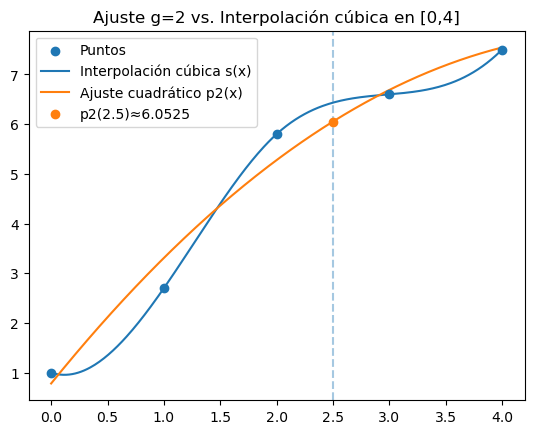

In [6]:
# Puntos del inciso anterior
x = np.array([0,1,2,3,4], dtype=float)
y = np.array([1,2.7,5.8,6.6,7.5], dtype=float)

# Ajuste polinómico grado 2 (mínimos cuadrados)
coef_g2 = np.polyfit(x, y, deg=2)     # [a, b, c]
p2 = np.poly1d(coef_g2)
x_eval = 2.5
y_p2 = float(p2(x_eval))

# Interpolación cúbica para comparar
s = interpolate.interp1d(x, y, kind="cubic")
xx = np.linspace(0, 4, 300)

print("Coeficientes (a, b, c) =", coef_g2)
print(f"p2(2.5) ≈ {y_p2:.7f}")

# Gráfica comparativa
plt.figure()
plt.scatter(x, y, label="Puntos", zorder=3)
plt.plot(xx, s(xx), label="Interpolación cúbica s(x)")
plt.plot(xx, p2(xx), label="Ajuste cuadrático p2(x)")
plt.axvline(x_eval, ls="--", alpha=0.4)
plt.scatter([x_eval], [y_p2], zorder=4, label=f"p2(2.5)≈{y_p2:.4f}")
plt.title("Ajuste g=2 vs. Interpolación cúbica en [0,4]")
plt.legend()
plt.show()


**Coeficientes estimados (mínimos cuadrados):**
$$
(a,b,c)=(-0.278571,\; 2.804286,\; 0.782857).
$$

**Evaluación en \(x=2.5\):**
$$
p_2(2.5)\approx \mathbf{6.0525}.
$$

El ajuste cuadrático minimiza el error global y **no** interpola cada punto; la cúbica sí interpola. Por eso:
$$
p_2(2.5)\;\ne\; s(2.5).
$$


4. Interpolación polinómica completa: Usa numpy.polyfit con grado 4 para obtener el
polinomio interpolador que pasa por todos los puntos anteriores. Evalúa el polinomio
en x=2.5 y compáralo con el valor de la interpolación cúbica.

Coeficientes p4 (grado 4): [ 0.254167 -2.141667  5.345833 -1.758333  1.      ]
p4(2.5) ≈ 6.4804688
s(2.5)  ≈ 6.4328125
Diferencia |p4(2.5) - s(2.5)| ≈ 4.7656250e-02


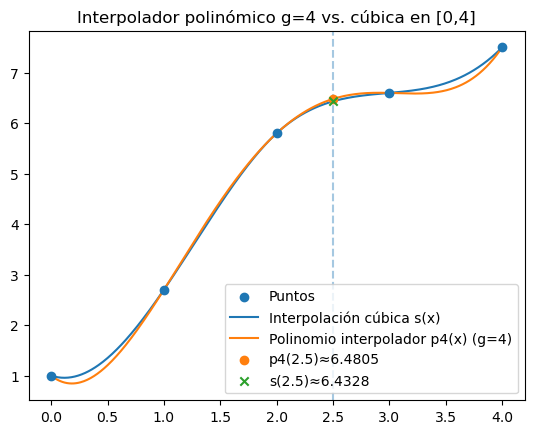

In [8]:
# Datos del inciso 2
x = np.array([0,1,2,3,4], dtype=float)
y = np.array([1,2.7,5.8,6.6,7.5], dtype=float)

# Interpolación cúbica (para comparar)
s = interpolate.interp1d(x, y, kind='cubic')
s_25 = float(s(2.5))

# Polinomio interpolador grado 4 (pasa por todos los puntos)
coef_g4 = np.polyfit(x, y, deg=4)
p4 = np.poly1d(coef_g4)
p4_25 = float(p4(2.5))

# Impresiones automáticas
print("Coeficientes p4 (grado 4):", coef_g4)
print(f"p4(2.5) ≈ {p4_25:.7f}")
print(f"s(2.5)  ≈ {s_25:.7f}")
print(f"Diferencia |p4(2.5) - s(2.5)| ≈ {abs(p4_25 - s_25):.7e}")

# Graficamos
xx = np.linspace(0, 4, 400)
plt.figure()
plt.scatter(x, y, label="Puntos", zorder=3)
plt.plot(xx, s(xx), label="Interpolación cúbica s(x)")
plt.plot(xx, p4(xx), label="Polinomio interpolador p4(x) (g=4)")
plt.axvline(2.5, ls="--", alpha=0.4)
plt.scatter([2.5],[p4_25], zorder=4, label=f"p4(2.5)≈{p4_25:.4f}")
plt.scatter([2.5],[s_25],  zorder=4, marker='x', label=f"s(2.5)≈{s_25:.4f}")
plt.title("Interpolador polinómico g=4 vs. cúbica en [0,4]")
plt.legend()
plt.show()


**Coeficientes del interpolador** \(p_4(x)=ax^4+bx^3+cx^2+dx+e\):
$$
(a,b,c,d,e)\approx (0.254167,\,-2.141667,\,5.345833,\,-1.758333,\,1.000000).
$$

**Evaluación en \(x=2.5\) y comparación con la cúbica \(s(x)\):**
$$
p_4(2.5)\approx 6.4804688, \qquad s(2.5)\approx 6.4328125,
$$
$$
\big|\,p_4(2.5)-s(2.5)\,\big|\approx 4.765625\times 10^{-2}.
$$

\(p_4\) interpola exactamente los cinco puntos, pero puede oscilar más que \(s(x)\) entre nodos (fenómeno de Runge).

5. Raíces de \(x^{3}-6x^{2}+11x-6\) (numpy.roots y Newton–Raphson)

Considera
$$
f(x)=x^{3}-6x^{2}+11x-6.
$$

1) Obtén sus raíces con `numpy.roots`.  
2) Encuéntralas también con Newton–Raphson usando semillas distintas.

In [10]:
# Ponemos el polinomio y la derivada
coef = [1, -6, 11, -6]   # x^3 - 6x^2 + 11x - 6
f  = np.poly1d(coef)
df = np.polyder(f)

# 1) Raíces con numpy.roots
r_np = np.roots(coef)
print("Raíces con numpy.roots:", r_np)

# 2) Raíces con Newton–Raphson (semillas distintas)
seeds = [0.5, 1.5, 2.5, 3.5]
r_newton = []
for s in seeds:
    r = optimize.newton(func=f, x0=s, fprime=df, tol=1e-12, maxiter=100)
    r_newton.append((s, r))

print("Raíces con Newton (semilla -> raíz):")
for s, r in r_newton:
    print(f"  {s:>4} -> {r:.12f}")

Raíces con numpy.roots: [3. 2. 1.]
Raíces con Newton (semilla -> raíz):
   0.5 -> 1.000000000000
   1.5 -> 3.000000000000
   2.5 -> 1.000000000000
   3.5 -> 3.000000000000


**Con `numpy.roots`:**
$$
\{1,\;2,\;3\}.
$$

**Con Newton–Raphson (semilla \(\to\) raíz):**
$$
0.5 \to 1,\qquad
1.5 \to 3,\qquad
2.5 \to 1,\qquad
3.5 \to 3.
$$

Las raíces reales son \(1,2,3\). Newton converge a la raíz dentro de la
**cuenca de atracción** de cada una; por eso distintas semillas (p.ej. \(1.5\) y \(2.5\))
pueden caer en \(3\) o en \(1\) respectivamente.

## Bloque 2 — Interedio

1. Area bajo \(\sin(x)\) en \([0,\pi]\) con `quad` y comparación analítica

Calcular
$$
I=\int_{0}^{\pi}\sin(x)\,dx
$$
usando `scipy.integrate.quad` y comparar contra la solución analítica

In [11]:
g = lambda x: math.sin(x)
I_quad, err = integrate.quad(g, 0, math.pi)
I_true = 2.0

print(f"I_quad = {I_quad:.12f}   (error est. quad ≈ {err:.1e})")
print(f"|I_quad - 2| = {abs(I_quad - I_true):.2e}")

I_quad = 2.000000000000   (error est. quad ≈ 2.2e-14)
|I_quad - 2| = 0.00e+00


**Cuadratura (`quad`):**
$$
I_{\text{quad}} \approx 2.000000000000
\qquad (\text{error estimado} \approx 2.2\times 10^{-14})
$$

**Valor analítico:**
$$
I_{\text{analítico}}=\int_{0}^{\pi}\sin(x)\,dx=2.
$$

**Error absoluto:**
$$
\big|I_{\text{quad}}-2\big| \approx 0.00\times 10^{0}.
$$

2. Genera \(n=20\) puntos con \(x_i\) equiespaciados en \([0,10]\):
$$

$$
y_i=\cos(x_i)+\varepsilon_i,\qquad \varepsilon_i\sim\mathcal N(0,\,0.1^2).
$$

Construye dos interpoladores sobre \((x_i,y_i)\):
- Lineal (`kind="linear"`)
- Cúbico (`kind="cubic"`)

Grafica los datos y ambas curvas en \([0,10]\) y comenta las diferencias (suavidad vs. ondulación).


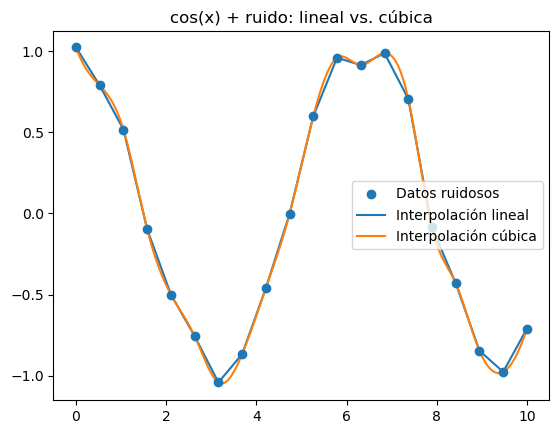

In [13]:
# Genereamos los 20 
rng = np.random.default_rng(197485)
n = 20
x_r = np.linspace(0, 10, n)
y_true = np.cos(x_r)
y_r = y_true + rng.normal(0, 0.1, size=n)  # ruido N(0, 0.1^2)

# Lineal vs Cúbica
interp_lin = interpolate.interp1d(x_r, y_r, kind='linear')
interp_cub = interpolate.interp1d(x_r, y_r, kind='cubic')

# Graficamos
xx = np.linspace(0, 10, 400)
plt.figure()
plt.scatter(x_r, y_r, label="Datos ruidosos", zorder=3)
plt.plot(xx, interp_lin(xx), label="Interpolación lineal")
plt.plot(xx, interp_cub(xx), label="Interpolación cúbica")
plt.title("cos(x) + ruido: lineal vs. cúbica")
plt.legend()
plt.show()


**Comparación de interpoladores**
- **Lineal:** tramos rectos entre nodos; sigue más el ruido local.  
- **Cúbica:** curva suave (derivada continua) que aproxima mejor la señal
  $$
  \cos(x)
  $$
  y atenúa el ruido entre nodos (puede ondular ligeramente).

3. Ajuste polinómico de grado 3 a los datos ruidosos

Ajusta por mínimos cuadrados el polinomio
$$
p_3(x)=ax^3+bx^2+cx+d
$$
a los puntos \((x_i,y_i)\) generados en B2.2 y reporta
$$
(a,b,c,d)\quad\text{y}\quad p_3(5).
$$
Grafica $$p_3(x)$$ junto con los datos en $$[0,10]$$ y comenta si el ajuste
captura la forma global de $$cos(x)$$ pese al ruido.


(a,b,c,d) = (-0.025823, 0.380188, -1.498508, 1.267758)
p3(5.0) ≈ 0.052063


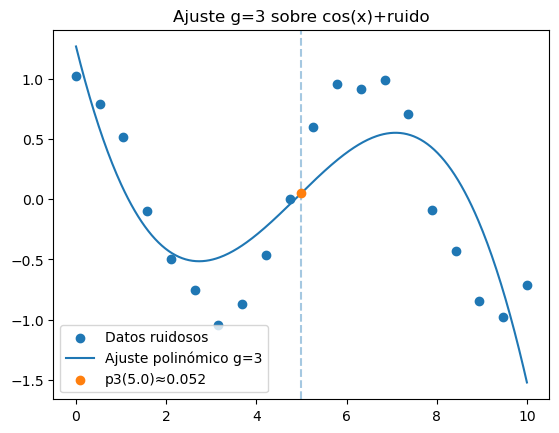

In [14]:
# Ajustamos grado 3
coef_g3 = np.polyfit(x_r, y_r, deg=3)   # [a, b, c, d]
a, b, c, d = coef_g3
p3 = np.poly1d(coef_g3)

# Evaluamos como referencia
x_eval = 5.0
y_eval = float(p3(x_eval))

print(f"(a,b,c,d) = ({a:.6f}, {b:.6f}, {c:.6f}, {d:.6f})")
print(f"p3({x_eval}) ≈ {y_eval:.6f}")

# Graficamos
xx = np.linspace(0, 10, 400)
plt.figure()
plt.scatter(x_r, y_r, label="Datos ruidosos", zorder=3)
plt.plot(xx, p3(xx), label="Ajuste polinómico g=3")
plt.axvline(x_eval, ls="--", alpha=0.4)
plt.scatter([x_eval], [y_eval], zorder=4, label=f"p3({x_eval})≈{y_eval:.3f}")
plt.title("Ajuste g=3 sobre cos(x)+ruido")
plt.legend()
plt.show()


**Coeficientes (mínimos cuadrados):**
$$
(a,b,c,d)=(-0.025823,\;0.380188,\;-1.498508,\;1.267758).
$$

**Evaluación:**
$$
p_3(5)\approx 0.0521.
$$

El polinomio cúbico captura la **tendencia global** de $$ cos(x) en [0,10] $$ pese al ruido, pero:
- puede **ondular** entre nodos y desviarse en los extremos (riesgo de extrapolación),
- no interpola cada punto (prioriza el **error global**).

4. Raíz de $$\cos(x)-x  [0,2] $$ con Newton–Raphson (implementación propia)

Resuelve
$$
h(x)=\cos(x)-x=0
$$
con tu **propia** implementación de Newton–Raphson, partiendo de \(x_0=1\).  
Compara el resultado con `scipy.optimize.newton` y reporta el número de iteraciones.


In [15]:
# Definimos la función
def newton_scalar(func, dfunc, x0, tol=1e-12, maxiter=100):
    x = float(x0)
    for k in range(maxiter):
        fx  = func(x)
        dfx = dfunc(x)
        if dfx == 0:
            raise ZeroDivisionError("Derivada cero en Newton.")
        x_new = x - fx/dfx
        if abs(x_new - x) < tol:
            return x_new, k+1
        x = x_new
    return x, maxiter

h  = lambda t: math.cos(t) - t
dh = lambda t: -math.sin(t) - 1

root_my, iters = newton_scalar(h, dh, x0=1.0)
root_sp = optimize.newton(h, 1.0, fprime=dh, tol=1e-12, maxiter=100)

print(f"Raíz (Newton propio): {root_my:.12f}  en {iters} iteraciones")
print(f"Raíz (scipy.newton):  {root_sp:.12f}")


Raíz (Newton propio): 0.739085133215  en 5 iteraciones
Raíz (scipy.newton):  0.739085133215


**Resultado con Newton propio (x₀=1):**
$$
x^\star \approx 0.739085133215 \quad \text{(5 iteraciones)}.
$$

**Verificación con `scipy.optimize.newton`:**
$$
x^\star_{\text{scipy}} \approx 0.739085133215.
$$

Como
$$
h'(x)=-\sin(x)-1 \neq 0
$$
cerca de la raíz, Newton converge de forma rápida y estable desde
$$
x_0=1.
$$









5.  Mínimo de \(x^{4}-3x^{3}+2\) con `scipy.optimize`

Minimiza
$$
\phi(x)=x^{4}-3x^{3}+2
$$
usando `scipy.optimize.minimize_scalar`.

**Reporta:**
$$
x^\star \quad \text{y} \quad \phi(x^\star),
$$
y confirma

x* = 2.250000
phi(x*) = -6.542969
 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -6.5429687499999964
       x: 2.250000000155948
     nit: 14
    nfev: 17


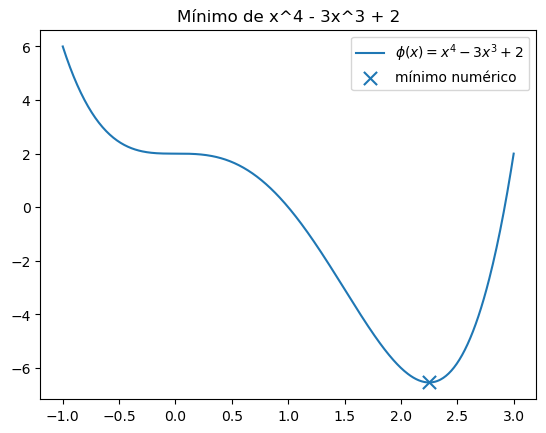

In [18]:
# Definimos la función a minimizar
phi = lambda x: x**4 - 3*x**3 + 2

# Optimizamos
res = optimize.minimize_scalar(phi, bracket=(-1, 2))
x_star = res.x
phi_star = phi(x_star)

print(f"x* = {x_star:.6f}")
print(f"phi(x*) = {phi_star:.6f}")
print(res)

# Graficamos
xx = np.linspace(-1, 3, 500)
plt.figure()
plt.plot(xx, [phi(t) for t in xx], label=r"$\phi(x)=x^4-3x^3+2$")
plt.scatter([x_star], [phi_star], marker='x', s=90, label="mínimo numérico")
plt.title("Mínimo de x^4 - 3x^3 + 2")
plt.legend()
plt.show()


**Óptimo numérico (minimize\_scalar):**
$$
x^\star \approx 2.25, \qquad \phi(x^\star)\approx -6.542969.
$$

**Verificación visual.**
$$
\phi(x)=x^{4}-3x^{3}+2,\qquad x\in[-1,3].
$$
La marca en \(x^\star\) coincide con el valle principal de \(\phi\) en ese rango.


6. Descenso de gradiente en \(f(x)=(x-3)^2+4\) con \(\alpha\in\{0.1,0.5,0.9\}\)

Minimiza
$$
f(x)=(x-3)^2+4
$$
mediante **descenso de gradiente** desde \(x_0=0\) durante 20 iteraciones para cada
$$
\alpha \in \{0.1,\;0.5,\;0.9\}.
$$

Reporta las trayectorias \(x_k\) y los valores \(f(x_k)\), y comenta la estabilidad y la velocidad para cada \(\alpha\).

alpha=0.1 -> x_20=2.965412, f(x_20)=4.001196


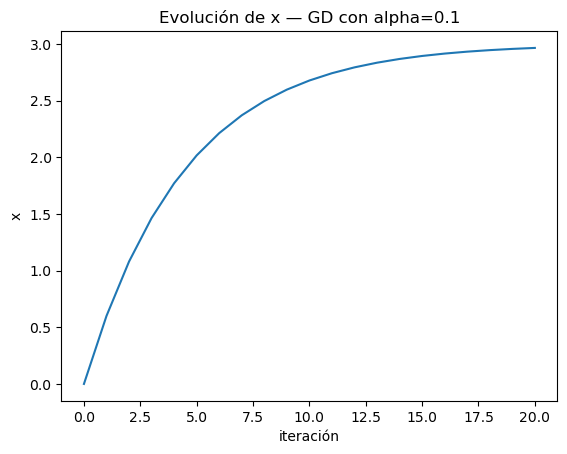

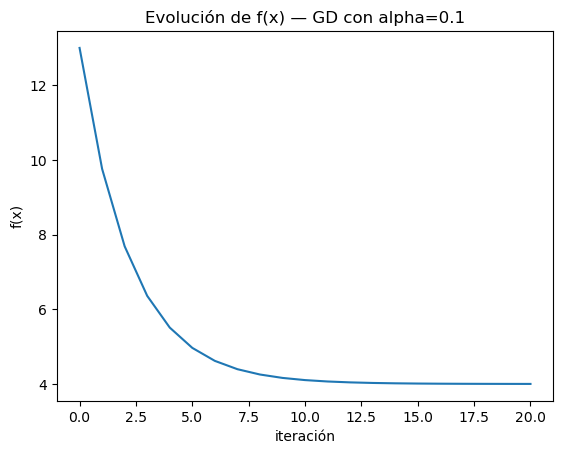

alpha=0.5 -> x_20=3.000000, f(x_20)=4.000000


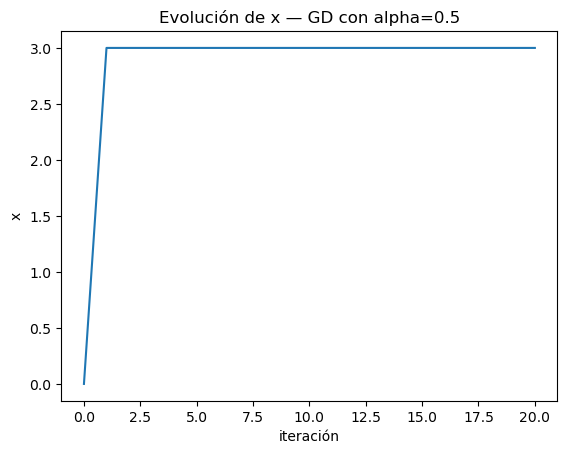

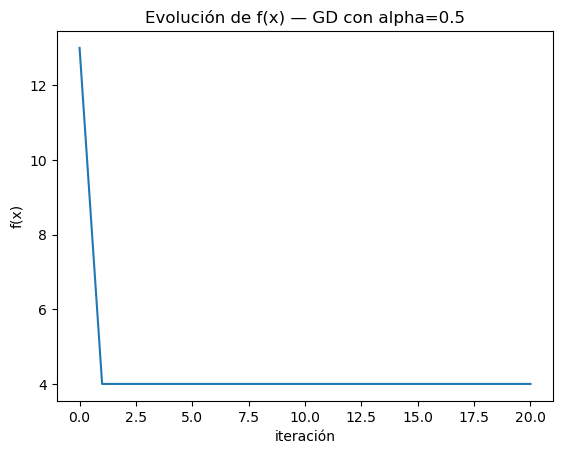

alpha=0.9 -> x_20=2.965412, f(x_20)=4.001196


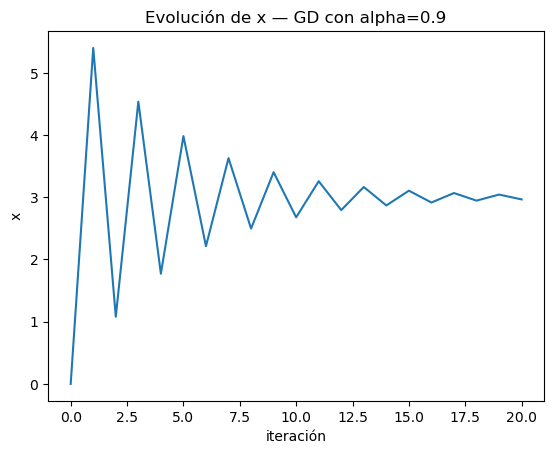

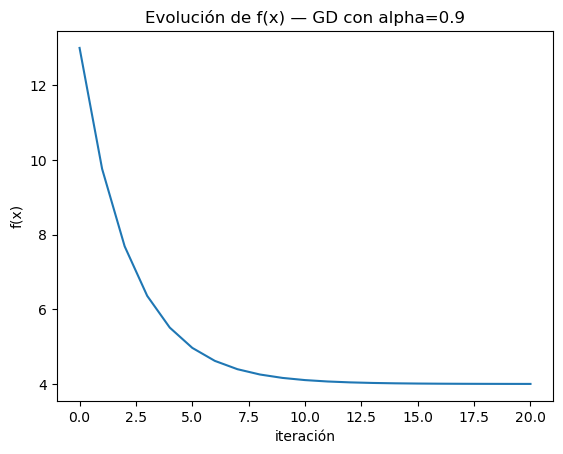

In [20]:
f  = lambda x: (x-3)**2 + 4
gf = lambda x: 2*(x-3)

def gd(x0, alpha, n=20):
    xs, fs = [x0], [f(x0)]
    x = x0
    for _ in range(n):
        x = x - alpha*gf(x)
        xs.append(x); fs.append(f(x))
    return np.array(xs), np.array(fs)

x0 = 0.0
for a in [0.1, 0.5, 0.9]:
    xs, fs = gd(x0, a, n=20)
    print(f"alpha={a} -> x_20={xs[-1]:.6f}, f(x_20)={fs[-1]:.6f}")

    plt.figure(); plt.plot(range(len(xs)), xs)
    plt.title(f"Evolución de x — GD con alpha={a}")
    plt.xlabel("iteración"); plt.ylabel("x"); plt.show()

    plt.figure(); plt.plot(range(len(fs)), fs)
    plt.title(f"Evolución de f(x) — GD con alpha={a}")
    plt.xlabel("iteración"); plt.ylabel("f(x)"); plt.show()

**Función y gradiente**
$$
f(x)=(x-3)^2+4, \qquad \nabla f(x)=2(x-3).
$$

**Regla de actualización**
$$
x_{k+1}=x_k-\alpha\,2(x_k-3)
\;=\;
(1-2\alpha)\,x_k+6\alpha.
$$

**Con \(x_0=0\) y 20 iteraciones:**
$$
\begin{aligned}
\alpha=0.1:&\quad x_{20}\approx 2.965412,\;\; f(x_{20})\approx 4.001196,\\[2pt]
\alpha=0.5:&\quad x_{20}=3.000000,\;\; f(x_{20})=4.000000,\\[2pt]
\alpha=0.9:&\quad x_{20}\approx 2.965412,\;\; f(x_{20})\approx 4.001196.
\end{aligned}
$$

**Análisis de estabilidad (factor \(1-2\alpha\))**
- \(\alpha=0.1\): \(|1-2\alpha|=0.8\Rightarrow\) **convergencia estable y lenta** (monótona).
- \(\alpha=0.5\): \(|1-2\alpha|=0\Rightarrow\) **convergencia en 1 paso** (\(x_1=3\)).
- \(\alpha=0.9\): \(|1-2\alpha|=0.8\) pero negativo \(\Rightarrow\) **convergencia oscilatoria** alrededor de \(x^\star=3\).

**Mínimo teórico**
$$
x^\star=3, \qquad f(x^\star)=4.
$$
